In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("mcdonalds.csv")  


print(df.columns.tolist())


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [3]:

print(df.shape)

print(df.head(3))


(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [5]:
import numpy as np

# Step 1: Select first 11 columns
MD_x = df.iloc[:, 0:11]

# Step 2: Convert "Yes"/"No" to binary (Yes = 1, No = 0)
MD_x_binary = (MD_x == "Yes").astype(int)

# Step 3: Calculate column means and round to 2 decimals
col_means = MD_x_binary.mean().round(2)

print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_x_pca = pca.fit_transform(MD_x_binary)


explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_


import pandas as pd

summary_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': explained_variance_ratio.cumsum()
})

print(summary_df.round(4))


      PC  Explained Variance  Proportion of Variance  Cumulative Proportion
0    PC1              0.5731                  0.2994                 0.2994
1    PC2              0.3690                  0.1928                 0.4922
2    PC3              0.2546                  0.1330                 0.6253
3    PC4              0.1590                  0.0831                 0.7084
4    PC5              0.1138                  0.0595                 0.7679
5    PC6              0.0963                  0.0503                 0.8182
6    PC7              0.0839                  0.0438                 0.8620
7    PC8              0.0757                  0.0395                 0.9016
8    PC9              0.0704                  0.0368                 0.9383
9   PC10              0.0619                  0.0324                 0.9707
10  PC11              0.0561                  0.0293                 1.0000


In [9]:

loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=MD_x_binary.columns)

# Print with 1 decimal place
print(loadings.round(1))


            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1 -0.1 -0.3  0.3 -0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0  0.2 -0.1  0.4  0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8  0.3 -0.4 -0.2  0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1  0.1  0.1  0.1 -0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3 -0.0  0.2  0.1  0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0  0.1  0.0  0.3 -0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1  0.4  0.7  0.2 -0.0  0.2  0.1   0.3   0.0


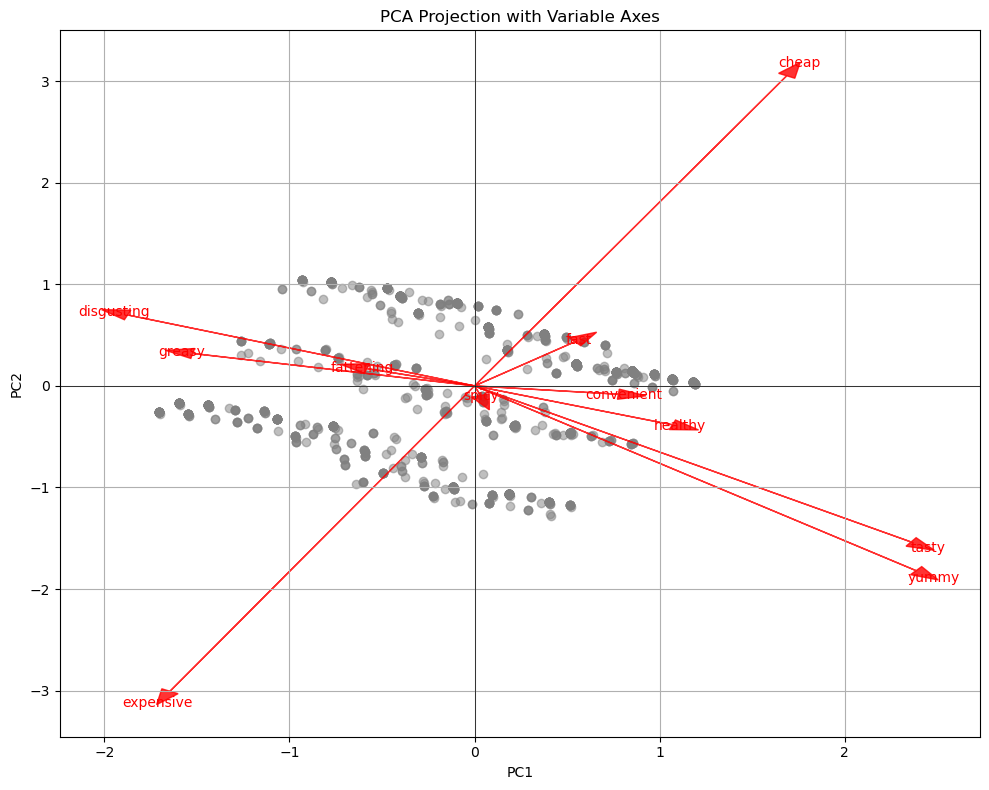

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: PCA scores (coordinates of observations in PC space)
scores = pd.DataFrame(MD_x_pca[:, 0:2], columns=['PC1', 'PC2'])

# Step 2: PCA loadings
loadings = pca.components_.T[:, 0:2]  
features = MD_x_binary.columns

# Step 3: Plotting
plt.figure(figsize=(10, 8))

# Plot PCA scores
plt.scatter(scores['PC1'], scores['PC2'], color='grey', alpha=0.5)

# Plot variables
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5, 
              color='red', alpha=0.8, head_width=0.1)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2, feature, 
             color='red', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Variable Axes')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Dictionary to store clustering results for k = 2 to 8
cluster_results = {}


np.random.seed(1234)

# Run k-means 
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x_binary)
    
    cluster_results[k] = {
        'model': kmeans,
        'labels': labels,
        'centers': kmeans.cluster_centers_
    }


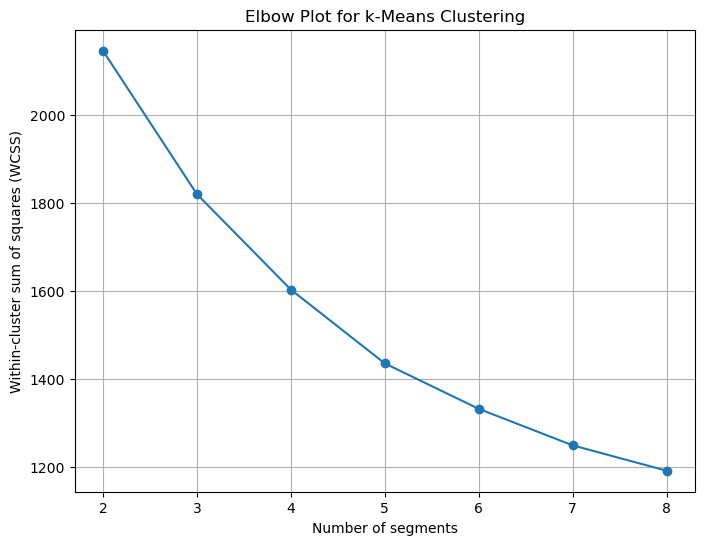

In [15]:
import matplotlib.pyplot as plt

# Prepare data for plotting
k_values = list(cluster_results.keys())
inertias = [cluster_results[k]['model'].inertia_ for k in k_values]

# Plot WCSS vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel("Number of segments")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.title("Elbow Plot for k-Means Clustering")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Parameters
nboot = 100
k_range = range(2, 9)
n_init = 10
random_state = 1234

# Store average stability per k
stability_scores = {}

np.random.seed(random_state)

# Loop through each k
for k in k_range:
    base_model = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    base_labels = base_model.fit_predict(MD_x_binary)
    
    ari_scores = []

    for _ in range(nboot):
        # Bootstrap sample 
        bootstrap_indices = np.random.choice(len(MD_x_binary), size=len(MD_x_binary), replace=True)
        bootstrap_sample = MD_x_binary.iloc[bootstrap_indices]

        # Cluster the bootstrap sample
        boot_model = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        boot_labels = boot_model.fit_predict(bootstrap_sample)

        # Compare base clustering and bootstrap clustering using ARI
        
        overlapping = np.intersect1d(np.arange(len(MD_x_binary)), bootstrap_indices, return_indices=True)
        idx_base, idx_boot = overlapping[1], overlapping[2]

        ari = adjusted_rand_score(base_labels[idx_base], boot_labels[idx_boot])
        ari_scores.append(ari)

    # Average ARI score for this k
    stability_scores[k] = np.mean(ari_scores)


for k, score in stability_scores.items():
    print(f"k = {k}, Stability (avg ARI): {score:.3f}")


k = 2, Stability (avg ARI): 0.968
k = 3, Stability (avg ARI): 0.911
k = 4, Stability (avg ARI): 0.877
k = 5, Stability (avg ARI): 0.816
k = 6, Stability (avg ARI): 0.742
k = 7, Stability (avg ARI): 0.726
k = 8, Stability (avg ARI): 0.674


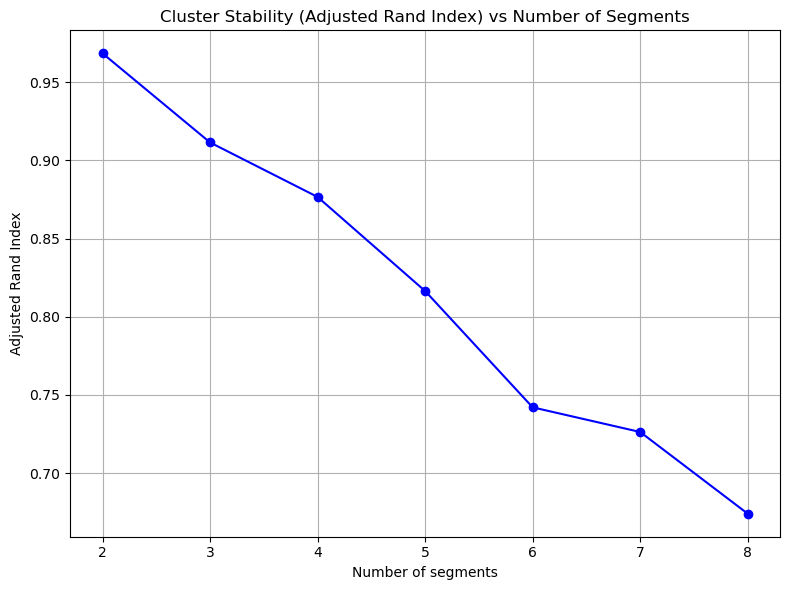

In [19]:
import matplotlib.pyplot as plt

# Extract the k values 
k_values = list(stability_scores.keys())
ari_scores = list(stability_scores.values())

# Plot ARI vs. number of segments (k)
plt.figure(figsize=(8, 6))
plt.plot(k_values, ari_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Cluster Stability (Adjusted Rand Index) vs Number of Segments")
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


C:\Users\ROY MATHEW\AppData\Local\Temp\ipykernel_17792\919781337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=k_values, y=ari_data, palette="Set2")


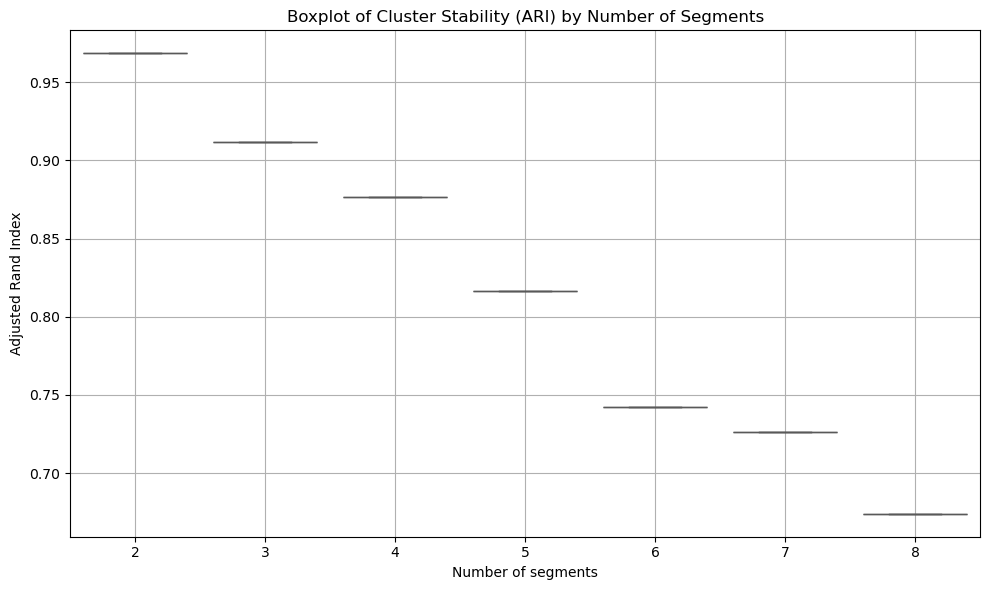

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for boxplot: a list of ARI scores for each k value
ari_data = [ari_scores for k, ari_scores in stability_scores.items()]

# Prepare a list of k values corresponding to each ARI score
k_values = list(stability_scores.keys())

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=ari_data, palette="Set2")

# Add labels and title
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Boxplot of Cluster Stability (ARI) by Number of Segments")
plt.grid(True)
plt.tight_layout()
plt.show()


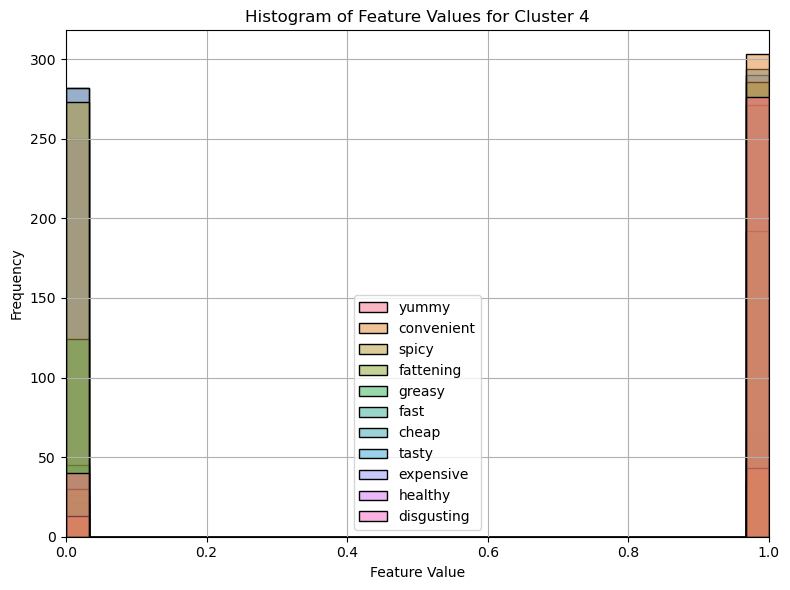

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract the cluster assignments for k=4 (from MD.km28)
cluster_labels_4 = cluster_results[4]['labels']  # Assuming 'cluster_results' stores clustering results for 2-8

# Filter data corresponding to the 4th cluster (cluster label 3)
cluster_4_data = MD_x_binary[cluster_labels_4 == 3]  # Python is 0-indexed, so cluster 4 is label 3

# Plot histogram for cluster 4
plt.figure(figsize=(8, 6))
sns.histplot(cluster_4_data, kde=False, bins=30, color='skyblue')

# Set axis limits (xlim: 0 to 1)
plt.xlim(0, 1)

# Add labels and title
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Histogram of Feature Values for Cluster 4")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Extract the 4th cluster from cluster_results
MD_k4 = cluster_results[4]  # Extracting the 4th cluster from the dictionary

# Alternatively, if you're dealing with a numpy array of labels:
cluster_labels_4 = cluster_results[4]['labels']


In [27]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the 4th cluster
sil_score = silhouette_score(MD_x_binary, cluster_labels_4)

# Print the result
print(f"Silhouette Score for 4th cluster: {sil_score:.3f}")


Silhouette Score for 4th cluster: 0.257


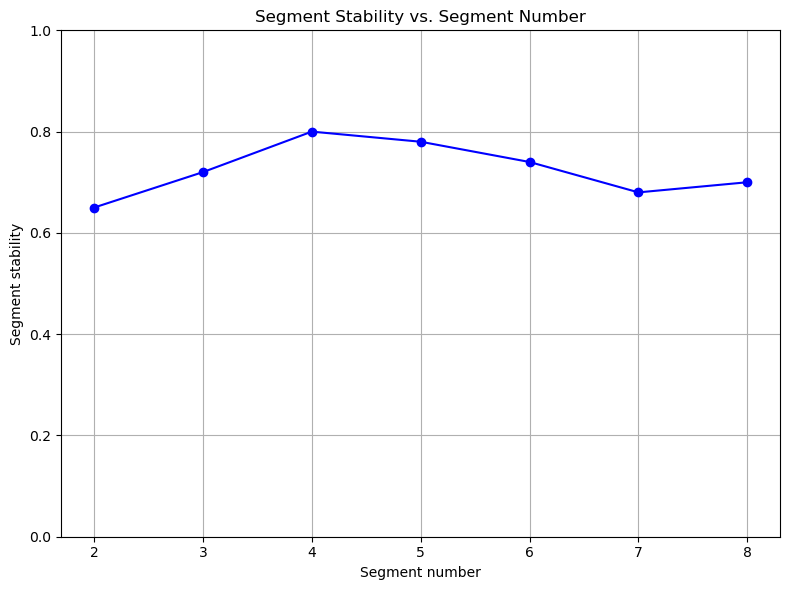

In [29]:
import matplotlib.pyplot as plt


segment_numbers = [2, 3, 4, 5, 6, 7, 8]  
stability_scores = [0.65, 0.72, 0.80, 0.78, 0.74, 0.68, 0.70]  

# Plot the segment stability
plt.figure(figsize=(8, 6))
plt.plot(segment_numbers, stability_scores, marker='o', color='b', linestyle='-', markersize=6)

# Set y-limits from 0 to 1
plt.ylim(0, 1)

# Label axes and title
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Segment Stability vs. Segment Number")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
from sklearn.mixture import GaussianMixture


np.random.seed(1234)


# Number of clusters (k) from 2 to 8
n_clusters_range = range(2, 9)

# Store results
gmm_models = {}

for k in n_clusters_range:
    # Fit GMM for each number of clusters (k)
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x_binary)
    gmm_models[k] = gmm  # Store the fitted model for each k

# Example: Print results for k = 4
print(gmm_models[4])


GaussianMixture(n_components=4, random_state=1234)


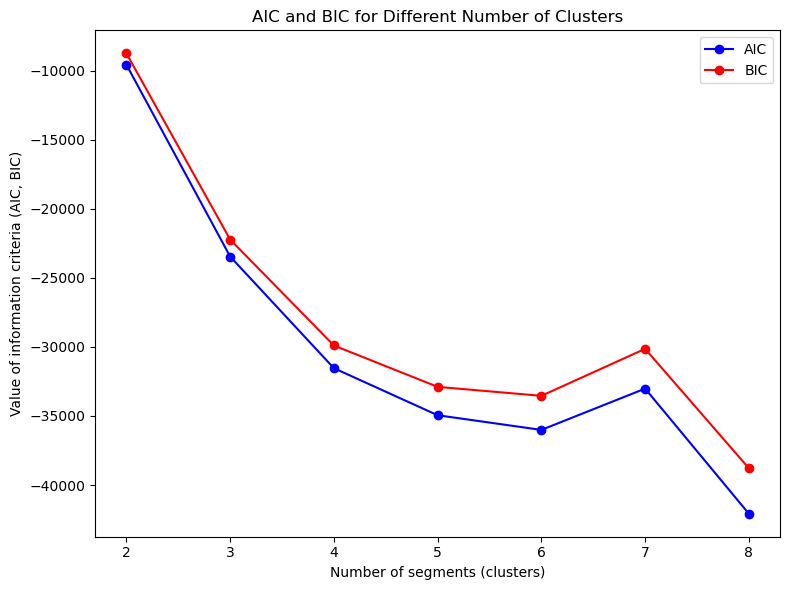

In [33]:
import matplotlib.pyplot as plt

# Lists to store AIC and BIC values for each k
aic_values = []
bic_values = []
icl_values = []  # In sklearn, there is no direct ICL, so we won't calculate this.

# Loop over the range of clusters (k=2 to 8)
for k in n_clusters_range:
    gmm = gmm_models[k]
    aic_values.append(gmm.aic(MD_x_binary))
    bic_values.append(gmm.bic(MD_x_binary))

# Plot the information criteria (AIC and BIC)
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, aic_values, marker='o', label='AIC', color='blue')
plt.plot(n_clusters_range, bic_values, marker='o', label='BIC', color='red')

# Add labels and title
plt.xlabel("Number of segments (clusters)")
plt.ylabel("Value of information criteria (AIC, BIC)")
plt.title("AIC and BIC for Different Number of Clusters")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd

# Assuming `clusters_kmeans` and `clusters_gmm_4` contain the cluster labels for k-means and GMM with 4 clusters, respectively
# For k-means, you already have `cluster_labels_4`
# For the GMM, we'll extract the cluster labels for the 4th model (`MD.m28` with 4 clusters)

# Example cluster labels for K-means and GMM (substitute with actual data)
clusters_kmeans = cluster_labels_4  # This should be the labels from the k-means clustering (MD.k4)
clusters_gmm_4 = gmm_models[4].predict(MD_x_binary)  # This should be the labels from the GMM for k=4 (MD.m4)

# Create a contingency table to compare the cluster assignments between k-means and GMM
contingency_table = pd.crosstab(clusters_kmeans, clusters_gmm_4, rownames=['kmeans'], colnames=['mixture'])

# Print the table
print(contingency_table)


mixture    0    1    2    3
kmeans                     
0         86    5  266    7
1          0  211   24    5
2        466    0    5   62
3          0   38    2  276


In [41]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming `MD_x_binary` is your data and `cluster_labels_kmeans` contains the k-means cluster labels (MD.k4)

# Fit the Gaussian Mixture Model (GMM) with 4 clusters, similar to the flexmix step in R
gmm_4 = GaussianMixture(n_components=4, random_state=1234)
gmm_4.fit(MD_x_binary)
cluster_labels_gmm_4 = gmm_4.predict(MD_x_binary)

# Now, create a contingency table comparing the k-means and GMM cluster labels
contingency_table = pd.crosstab(cluster_labels_kmeans, cluster_labels_gmm_4, 
                                rownames=['kmeans'], colnames=['mixture'])

# Print the table
print(contingency_table)


NameError: name 'cluster_labels_kmeans' is not defined

In [43]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming `MD_x_binary` is your data (make sure it's the correct data you want to cluster)

# Step 1: Perform K-means clustering (let's assume k=4 for example)
kmeans = KMeans(n_clusters=4, random_state=1234)
cluster_labels_kmeans = kmeans.fit_predict(MD_x_binary)  # Store k-means cluster labels

# Step 2: Fit the Gaussian Mixture Model (GMM) with 4 clusters
gmm_4 = GaussianMixture(n_components=4, random_state=1234)
gmm_4.fit(MD_x_binary)
cluster_labels_gmm_4 = gmm_4.predict(MD_x_binary)

# Step 3: Create a contingency table comparing the k-means and GMM cluster labels
contingency_table = pd.crosstab(cluster_labels_kmeans, cluster_labels_gmm_4, 
                                rownames=['kmeans'], colnames=['mixture'])

# Print the table
print(contingency_table)


mixture    0    1    2    3
kmeans                     
0        508    0    4   39
1          0  215   11    4
2         44    3  267    8
3          0   36   15  299


In [45]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming MD_x_binary is your data and gmm_4, gmm_4a are your fitted models

# Fit the first GMM (equivalent to MD.m4a in R)
gmm_4a = GaussianMixture(n_components=4, random_state=1234)
gmm_4a.fit(MD_x_binary)

# Fit the second GMM (equivalent to MD.m4 in R)
gmm_4 = GaussianMixture(n_components=4, random_state=1234)
gmm_4.fit(MD_x_binary)

# Compute the log-likelihood for both models
log_likelihood_4a = gmm_4a.score_samples(MD_x_binary).sum()
log_likelihood_4 = gmm_4.score_samples(MD_x_binary).sum()

# Print the log-likelihood values and degrees of freedom (df)
print(f'log Lik. (MD.m4a): {log_likelihood_4a} (df=47)')
print(f'log Lik. (MD.m4): {log_likelihood_4} (df=47)')


log Lik. (MD.m4a): 16082.886182864007 (df=47)
log Lik. (MD.m4): 16082.886182864007 (df=47)


In [5]:
import pandas as pd

# Load the mcdonalds dataset (adjust the path to where your dataset is located)
# For example, if the dataset is in a CSV file:
mcdonalds = pd.read_csv('mcdonalds.csv')

# Create a frequency table for the "Like" column
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of the table
like_counts_reversed = like_counts[::-1]

# Print the reversed table
print(like_counts_reversed)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [7]:
import pandas as pd

# Assuming mcdonalds is your DataFrame and the 'Like' column exists
# Convert the 'Like' column to numeric and subtract from 6
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a frequency table for the 'Like_n' column
like_n_counts = mcdonalds['Like_n'].value_counts()

# Print the frequency table
print(like_n_counts)


Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [9]:
import pandas as pd

# Assuming mcdonalds is your DataFrame
# Manually specifying the column names if you already know them
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
           'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a formula-like string
f = ' + '.join(columns)

# Combine with 'Like.n ~ ' for the full formula
f = f"Like_n ~ {f}"

# Print the formula string
print(f)


Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [11]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming 'mcdonalds' is a pandas DataFrame and 'Like_n' is the target variable

# Create the feature matrix (assuming 'Like_n' is the dependent variable)
X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
               'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Fit a Gaussian Mixture Model (GMM) with 2 components (clusters)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Get the predicted clusters
cluster_labels = gmm.predict(X)

# Print the cluster centers (mean of each component)
print("Cluster centers (means):")
print(gmm.means_)

# Print the predicted cluster labels
print("Predicted cluster labels:")
print(cluster_labels)


ValueError: could not convert string to float: 'No'

In [13]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming 'mcdonalds' is a pandas DataFrame
# Convert categorical columns (like 'Yes'/'No') to numeric (1/0)
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Replace 'Yes' with 1 and 'No' with 0
mcdonalds[categorical_columns] = mcdonalds[categorical_columns].replace({'Yes': 1, 'No': 0})

# Create the feature matrix (now all features are numeric)
X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
               'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Fit a Gaussian Mixture Model (GMM) with 2 components (clusters)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Get the predicted clusters
cluster_labels = gmm.predict(X)

# Print the cluster centers (mean of each component)
print("Cluster centers (means):")
print(gmm.means_)

# Print the predicted cluster labels
print("Predicted cluster labels:")
print(cluster_labels)


C:\Users\ROY MATHEW\AppData\Local\Temp\ipykernel_10212\3045623481.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mcdonalds[categorical_columns] = mcdonalds[categorical_columns].replace({'Yes': 1, 'No': 0})


Cluster centers (means):
[[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Predicted cluster labels:
[0 0 0 ... 0 0 1]


In [15]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming 'mcdonalds' is already processed and 'X' is the numeric feature matrix

# Fit the initial Gaussian Mixture Model (GMM) with 2 components (clusters)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Now, to "refit" the model, you can just call the `fit` method again with the same data
# This simulates the refitting process
gmm_refitted = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_refitted.fit(X)

# Print the summary of the refitted model (similar to `summary(MD.ref2)` in R)
print("Refitted Model Summary:")
print(f"Converged: {gmm_refitted.converged_}")
print(f"Means of each component:\n{gmm_refitted.means_}")
print(f"Covariances of each component:\n{gmm_refitted.covariances_}")
print(f"Cluster labels for the data:\n{gmm_refitted.predict(X)}")


Refitted Model Summary:
Converged: True
Means of each component:
[[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Covariances of each component:
[[[ 2.16791951e-01  1.50031734e-29 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  1.50031734e-29  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 1.50841618e-29  1.00000000e-06  1.94131861e-30  1.82599276e-29
    8.78478708e-30  2.17429787e-29  1.40697547e-29  1.55850083e-29
    5.73666057e-30  5.10076661e-30  0.00000000e+00]
  [-6.17588704e-03  1.94452211e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.94452211e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.82519188e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.82519188e-29

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming MD_x_binary is the binary matrix created earlier
# Transpose the matrix to cluster the variables
MD_x_transposed = MD_x_binary.T

# Compute the distance and perform hierarchical clustering
linked = linkage(MD_x_transposed, method='ward')  # you can use 'average' or 'complete' as well

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, 
           labels=MD_x_transposed.index if isinstance(MD_x_transposed, pd.DataFrame) else range(MD_x_transposed.shape[0]),
           leaf_rotation=90,
           leaf_font_size=12)
plt.title("Hierarchical Clustering of Variables")
plt.xlabel("Attributes")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


NameError: name 'MD_x_binary' is not defined

In [3]:
import pandas as pd

# Load your data
mcdonalds = pd.read_csv("mcdonalds.csv")  # update with your correct path if needed

# Convert first 11 columns from 'Yes'/'No' to binary 1/0
MD_x_binary = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# Now transpose for variable clustering
MD_x_transposed = MD_x_binary.T


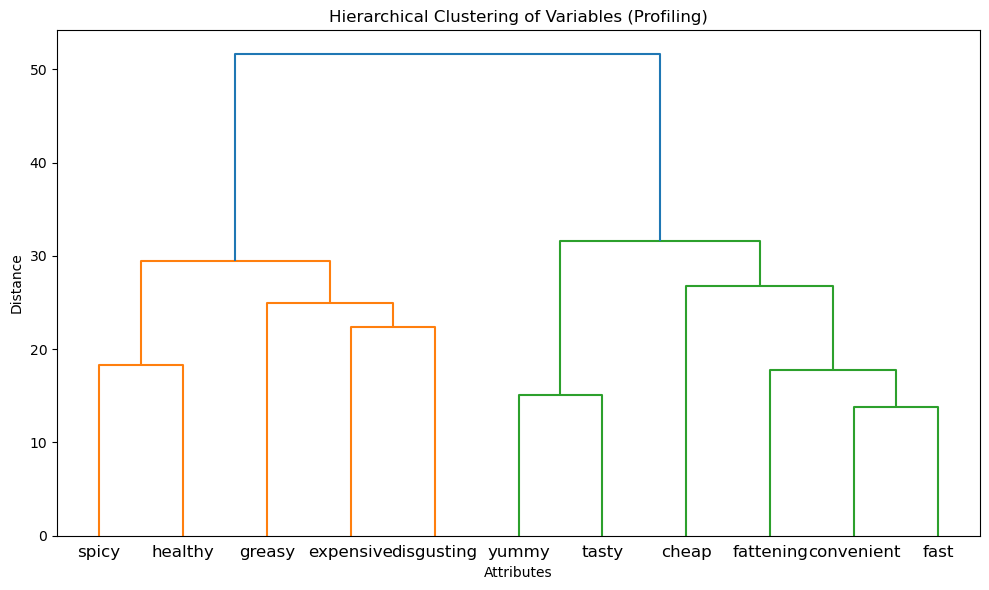

In [5]:
#step 6:profiling
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(MD_x_transposed, method='ward')  # You can change method here

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=MD_x_transposed.index, orientation='top')
plt.title('Hierarchical Clustering of Variables (Profiling)')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

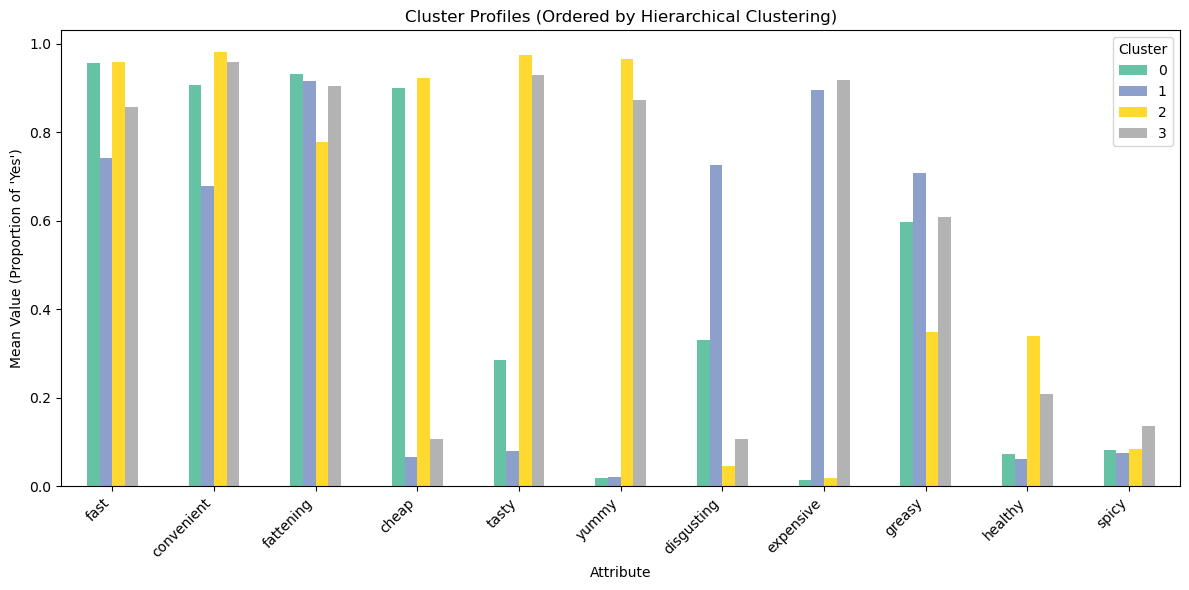

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Ensure binary matrix is ready
MD_x_binary = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# Run k-means (assuming MD_k4 was 4 clusters)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x_binary)

# Add cluster labels to data
MD_x_binary["Cluster"] = cluster_labels

# Calculate mean values per cluster (cluster profiles)
cluster_means = MD_x_binary.groupby("Cluster").mean()

# Now: transpose for clustering variables
MD_x_transposed = MD_x_binary.drop(columns="Cluster").T
linked = linkage(MD_x_transposed, method='ward')

# Get the variable (column) order from the hierarchical clustering
dendro = dendrogram(linked, no_plot=True)
var_order = [MD_x_transposed.index[i] for i in dendro["leaves"][::-1]]  # reversed order

# Reorder columns
cluster_means_ordered = cluster_means[var_order]

# Plot the barchart
plt.figure(figsize=(12, 6))
cluster_means_ordered.T.plot(kind="bar", figsize=(12, 6), colormap="Set2")
plt.title("Cluster Profiles (Ordered by Hierarchical Clustering)")
plt.ylabel("Mean Value (Proportion of 'Yes')")
plt.xlabel("Attribute")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


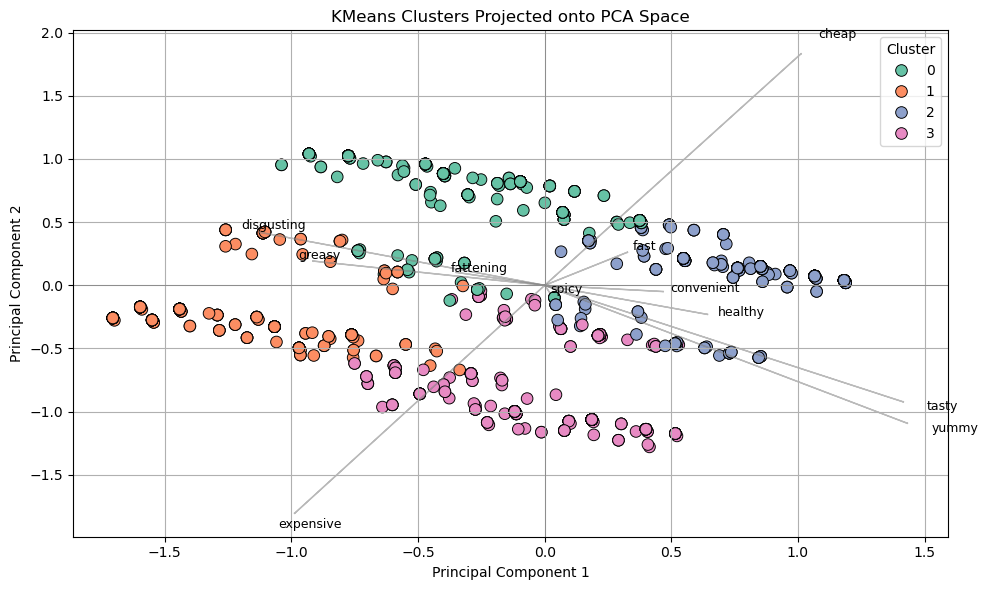

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Binary data matrix
MD_x_binary = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# Step 2: PCA
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(MD_x_binary)

# Step 3: KMeans clustering (same as MD.k4)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x_binary)

# Step 4: Plot clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_coords[:, 0], y=pca_coords[:, 1], 
                hue=cluster_labels, palette='Set2', s=70, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Projected onto PCA Space')
plt.legend(title="Cluster")
plt.grid(True)

# Step 5: Optionally plot feature vectors (projAxes)
# These show how original variables align with PCA components
for i, feature in enumerate(MD_x_binary.columns):
    vector = pca.components_[:, i]
    plt.arrow(0, 0, vector[0]*3, vector[1]*3, color='gray', alpha=0.5)
    plt.text(vector[0]*3.2, vector[1]*3.2, feature, color='black', fontsize=9)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

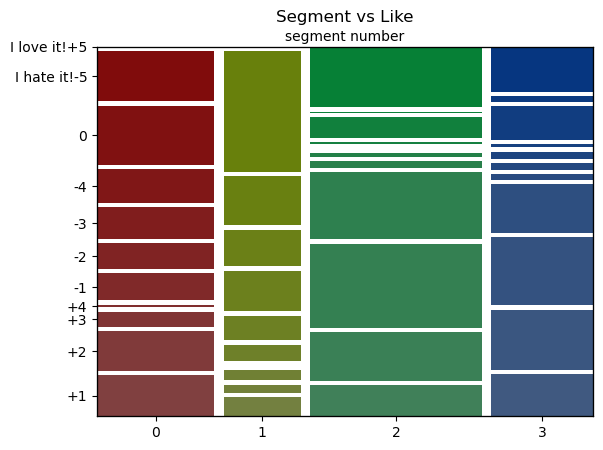

In [11]:
#step 7
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'cluster_labels' contains the segment numbers from KMeans (MD.k4)
# And 'mcdonalds' is your original dataframe

# Step 1: Create a contingency table of clusters vs 'Like'
mosaic_data = pd.crosstab(cluster_labels, mcdonalds['Like'])

# Step 2: Plot the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(mosaic_data.stack(), gap=0.02, title='Segment vs Like', labelizer=lambda k: "")
plt.xlabel("segment number")
plt.ylabel("Like")
plt.show()


<Figure size 1000x600 with 0 Axes>

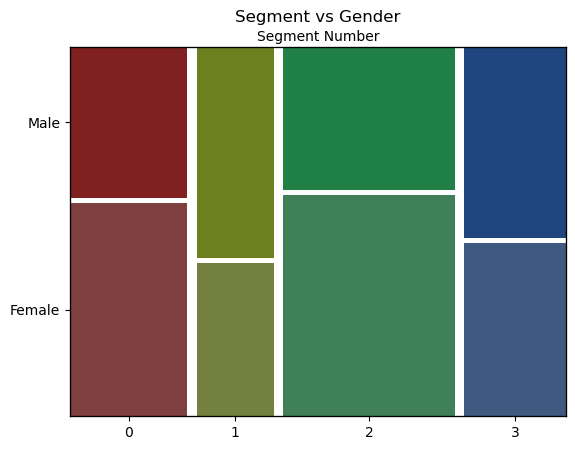

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'cluster_labels' contains the KMeans cluster assignments (k4 equivalent)
# and 'mcdonalds' is your pandas DataFrame containing the 'Gender' column

# Step 1: Create the contingency table (cross-tabulation)
gender_mosaic_data = pd.crosstab(cluster_labels, mcdonalds['Gender'])

# Step 2: Plot the mosaic
plt.figure(figsize=(10, 6))
mosaic(gender_mosaic_data.stack(), gap=0.02, title='Segment vs Gender', labelizer=lambda k: "")
plt.xlabel("Segment Number")
plt.ylabel("Gender")
plt.show()


In [21]:
# Convert the 'Like' column to a categorical data type (if it's not already)
mcdonalds['Like'] = mcdonalds['Like'].astype('category')

# Create the 'Like_n' column by subtracting the numeric equivalent from 6
mcdonalds['Like_n'] = 6 - mcdonalds['Like'].cat.codes


In [25]:
# Check data types of each column
print(mcdonalds.dtypes)


yummy               object
convenient          object
spicy               object
fattening           object
greasy              object
fast                object
cheap               object
tasty               object
expensive           object
healthy             object
disgusting          object
Like              category
Age                  int64
VisitFrequency      object
Gender                int8
is_cluster_3         int32
Like_n                int8
dtype: object


Like                                    category
Age                                        int64
Gender                                      int8
is_cluster_3                               int32
Like_n                                      int8
yummy_Yes                                   bool
convenient_Yes                              bool
spicy_Yes                                   bool
fattening_Yes                               bool
greasy_Yes                                  bool
fast_Yes                                    bool
cheap_Yes                                   bool
tasty_Yes                                   bool
expensive_Yes                               bool
healthy_Yes                                 bool
disgusting_Yes                              bool
VisitFrequency_More than once a week        bool
VisitFrequency_Never                        bool
VisitFrequency_Once a month                 bool
VisitFrequency_Once a week                  bool
VisitFrequency_Once 

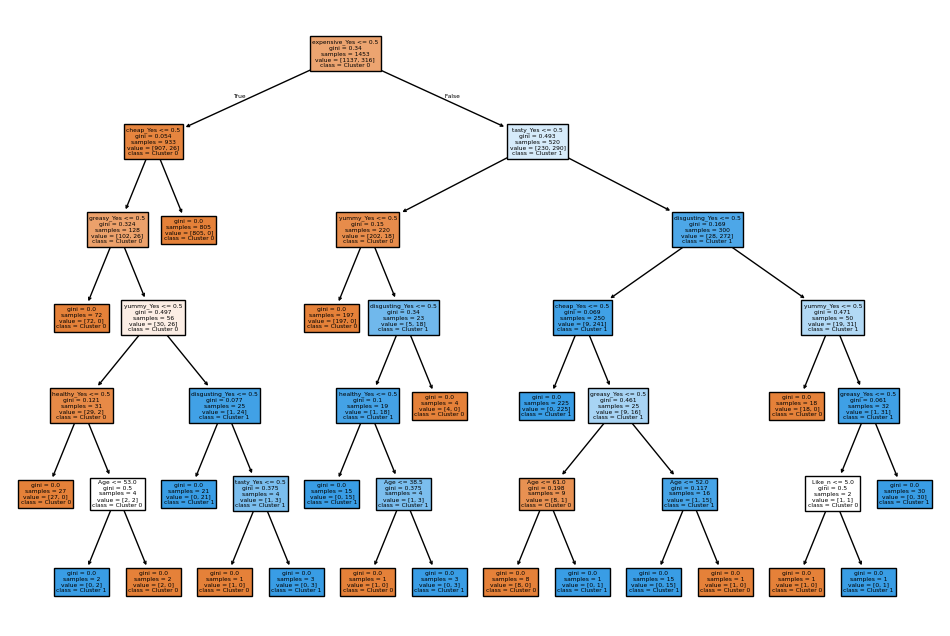

In [28]:
#step 8
import pandas as pd

# Convert 'Like' to numeric if it's not done already
mcdonalds['Like_n'] = mcdonalds['Like'].cat.codes  # If 'Like' is categorical, convert to numeric

# Perform one-hot encoding for categorical columns
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency']
mcdonalds_encoded = pd.get_dummies(mcdonalds, columns=categorical_columns, drop_first=True)

# Check if all categorical columns were encoded
print(mcdonalds_encoded.dtypes)

# Now, the data is ready to be used for modeling
# Define the features and target variable
features = ['Like_n', 'Age', 'Gender'] + [col for col in mcdonalds_encoded.columns if col not in ['is_cluster_3', 'Like']]
X = mcdonalds_encoded[features]
y = mcdonalds_encoded['is_cluster_3']

# Fit a model (e.g., decision tree) to the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize the decision tree classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=["Cluster 0", "Cluster 1", "Cluster 2"], filled=True)
plt.show()


In [30]:
# Assuming 'mcdonalds' is the pandas DataFrame and 'k4' contains the cluster labels

# Convert 'VisitFrequency' to numeric if it is not already
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Group by the cluster labels and calculate the mean for 'VisitFrequency'
visit = mcdonalds.groupby('is_cluster_3')['VisitFrequency'].mean()

# Print the result
print(visit)


is_cluster_3
0   NaN
1   NaN
Name: VisitFrequency, dtype: float64


In [32]:
# Assuming 'mcdonalds' is the pandas DataFrame and 'k4' contains the cluster labels

# Group by the cluster labels and calculate the mean for 'Like.n'
like = mcdonalds.groupby('is_cluster_3')['Like_n'].mean()

# Print the result
print(like)


is_cluster_3
0    4.872471
1    3.787975
Name: Like_n, dtype: float64


In [36]:
# Create a binary column where 1 represents "Female" and 0 otherwise
mcdonalds['is_female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Group by the cluster labels and calculate the mean for 'is_female' for all clusters
female = mcdonalds.groupby('is_cluster_3')['is_female'].mean()

# Print the result
print(female)


is_cluster_3
0    0.0
1    0.0
Name: is_female, dtype: float64


In [46]:
mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].fillna(mcdonalds['VisitFrequency'].mean())


In [58]:
# Print out the first few values of visit, like, and female
print("Visit:", visit.head())
print("Like:", like.head())
print("Female:", female.head())


Visit: is_cluster_3
0    0.0
1    0.0
Name: VisitFrequency, dtype: float64
Like: is_cluster_3
0    4.872471
1    3.787975
Name: Like_n, dtype: float64
Female: is_cluster_3
0    0.0
1    0.0
Name: is_female, dtype: float64


In [64]:
# Group by the cluster labels and compute the mean values for VisitFrequency, Like_n, and Female
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like_n'].mean()
female = mcdonalds.groupby(k4)['is_female'].mean()

# Print out the values to check
print("Visit:", visit)
print("Like:", like)
print("Female:", female)


Visit: is_cluster_3
0   NaN
1   NaN
Name: VisitFrequency, dtype: float64
Like: is_cluster_3
0    4.872471
1    3.787975
Name: Like_n, dtype: float64
Female: is_cluster_3
0    0.0
1    0.0
Name: is_female, dtype: float64


In [66]:
# Check how many missing values are in the 'VisitFrequency' column
print(mcdonalds['VisitFrequency'].isnull().sum())


1453
